In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
import warnings
import sys 
if not sys.warnoptions:
    warnings . simplefilter( "ignore" )

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)


In [3]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# cheaking for missing values
print(X.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


there is no null values

In [12]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=iris.feature_names)


# k mean clustering

K-Means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into K distinct clusters. It works as follows:

Initialize: Select K initial cluster centroids (randomly or using specific methods like K-Means++).
Assign: Each data point is assigned to the nearest centroid, forming K clusters.
Update: Compute new centroids as the mean of the points in each cluster.
Repeat: Steps 2 and 3 are repeated until centroids no longer change significantly or a stopping criterion is met.

The Iris dataset contains three distinct species of flowers (Setosa, Versicolor, and Virginica), which naturally form groups based on petal and sepal dimensions.
K = 3 is a reasonable choice since we know there are three species.
K-Means works well with numerical data like the Iris dataset, allowing for effective grouping.
The dataset is relatively small and well-structured, making K-Means computationally efficient.
However, K-Means assumes clusters are spherical and equally sized, which may not always be true for the Iris dataset.


In [15]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)


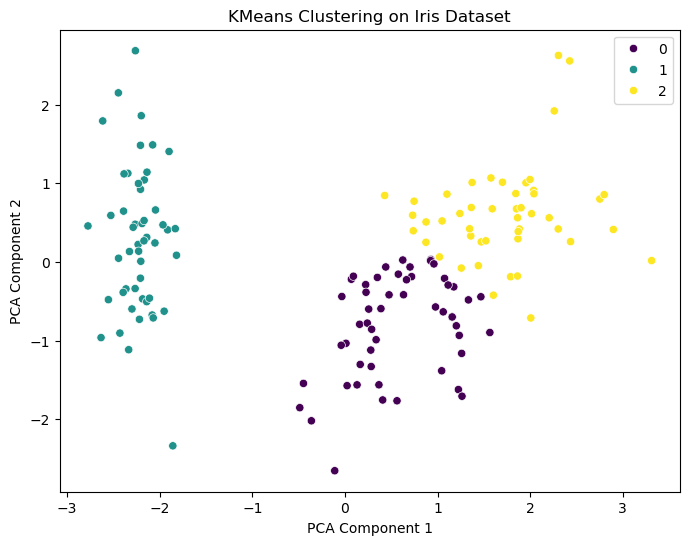

In [16]:
# Visualizing KMeans Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Hierarchical Clustering

In [ ]:
Hierarchical clustering is an unsupervised machine learning algorithm that builds a hierarchy of clusters using one of two approaches:

Agglomerative (Bottom-Up):

Starts with each data point as its own cluster.
Iteratively merges the closest clusters based on a distance metric (e.g., Euclidean distance).
Continues until all points belong to a single cluster or a stopping criterion is met.
Divisive (Top-Down):

Starts with all data points in a single cluster.
Recursively splits clusters into smaller groups.
The result is a dendrogram, a tree-like structure that visually represents cluster relationships. The optimal number of clusters can be chosen by cutting the dendrogram at a specific level.

Why is Hierarchical Clustering Suitable for the Iris Dataset?
No need to specify K in advance: Unlike K-Means, hierarchical clustering allows exploration of different cluster numbers by analyzing the dendrogram.
Captures hierarchical relationships: It reveals how species in the Iris dataset are related at different levels of similarity.
Handles non-spherical clusters better: It can model complex cluster shapes that might not be well-suited for K-Means.
Small dataset: Since hierarchical clustering is computationally expensive, it is more suitable for small datasets like Iris.
However, hierarchical clustering can be sensitive to noise and outliers, and its computational cost increases with larger datasets.

In [17]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)


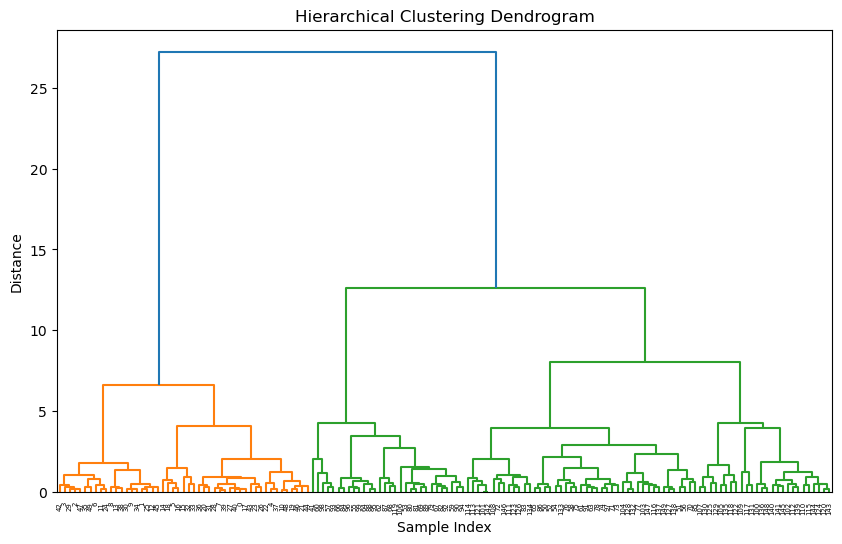

In [18]:
# Visualizing Dendrogram
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

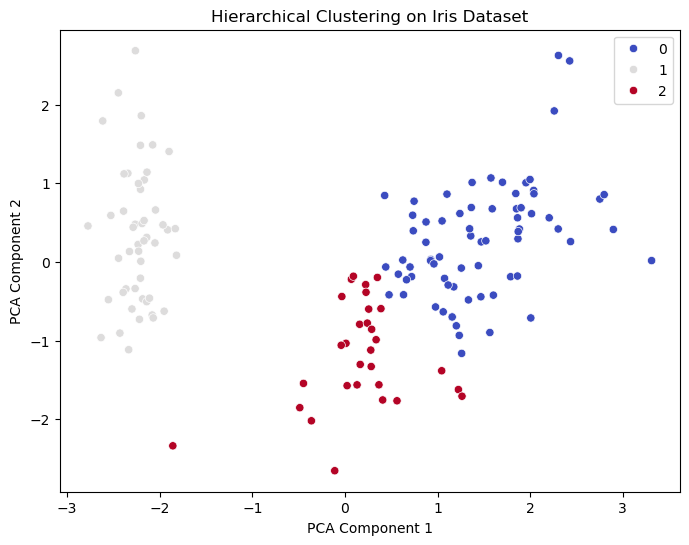

In [19]:
# Visualizing Hierarchical Clustering using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette='coolwarm')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
